# Crime and Weather-ment

Will an increase in certain weather conditions be statistically related to increases in crime?

In [235]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as stats



crime_2019=pd.read_csv("data/Crime_Data_2019.csv") #2019- 2021
louisville_weather=pd.read_csv("data/2451549.csv") #Weather from 1-1-1997 til 2-9-2021

# print(crime_2019.describe())

num_crime_reports = len(crime_2019)
print("The number of crime reports: ", num_crime_reports)

list_of_crime_types = crime_2019.CRIME_TYPE.unique()


total_counts = crime_2019['CRIME_TYPE'].value_counts()

# crime_2019


The number of crime reports:  148863


In [236]:
total_counts

ASSAULT                     31201
THEFT/LARCENY               26797
OTHER                       17429
DRUGS/ALCOHOL VIOLATIONS    14249
VEHICLE BREAK-IN/THEFT      13865
VANDALISM                   12096
BURGLARY                     9821
MOTOR VEHICLE THEFT          9136
FRAUD                        7413
ROBBERY                      2409
WEAPONS                      2092
SEX CRIMES                    999
DISTURBING THE PEACE          863
HOMICIDE                      288
ARSON                         198
DUI                             7
Name: CRIME_TYPE, dtype: int64

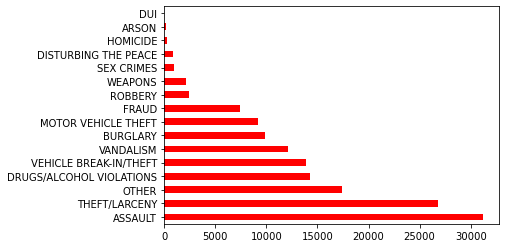

In [237]:
total_counts.plot.barh(x='Number of crimes', color='red' )

In [238]:
#Strips the time from date/time
crime_2019['DATE_OCCURED_NOTIME'] = crime_2019['DATE_OCCURED'].str.split(' ').str[0]
# crime_2019['DATE_OCCURED_NOTIME']

In [239]:
louisville_weather['PRCP'].describe()   #describe precipitation column
# louisville_weather['DATE']


count    8803.000000
mean        0.148638
std         0.400267
min         0.000000
25%         0.000000
50%         0.000000
75%         0.070000
max        10.480000
Name: PRCP, dtype: float64

In [240]:
# louisville_weather.describe()
louisville_weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'MDPR',
       'MDPR_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES',
       'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'WESD', 'WESD_ATTRIBUTES',
       'WT01', 'WT01_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT11', 'WT11_ATTRIBUTES'],
      dtype='object')

In [241]:
date_crime_count_df = louisville_weather[['DATE','PRCP','SNOW','TMAX','TMIN']].iloc[8035:8766]
date_crime_count_df

,DATE,PRCP,SNOW,TMAX,TMIN
8035,2019-01-01,0.00,0.0,53.0,41.0
8036,2019-01-02,0.00,0.0,43.0,39.0
8037,2019-01-03,0.00,0.0,43.0,35.0
8038,2019-01-04,0.69,0.0,46.0,35.0
8039,2019-01-05,0.01,0.0,56.0,35.0
...,...,...,...,...,...
8761,2020-12-27,0.00,0.0,57.0,30.0
8762,2020-12-28,0.00,0.0,53.0,28.0
8763,2020-12-29,0.00,0.0,39.0,29.0
8764,2020-12-30,1.00,0.0,58.0,34.0


In [242]:
#Take all of the crime types for the day, count them, and put them in a series to be connected to the specific day
crime_series=[]
assault_series=[]
theft_series=[]
other_series=[]
drugs_series=[]
vehicle_break_series=[]
vandalism_series=[]
burglary_series=[]
motor_vehicle_theft_series=[]
fraud_series=[]
robbery_series=[]
weapons_series=[]
sex_crimes_series=[]
disturbing_peace_series=[]
homicide_series=[]
arson_series=[]
dui_series=[]

for date in date_crime_count_df['DATE']:
    crime_series.append((crime_2019['DATE_OCCURED_NOTIME']==date).sum())
    assault_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="ASSAULT") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    theft_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="THEFT/LARCENY") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    other_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="OTHER") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    drugs_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="DRUGS/ALCOHOL VIOLATIONS") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    vehicle_break_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="VEHICLE BREAK-IN/THEFT") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    vandalism_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="VANDALISM") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    burglary_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="BURGLARY") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    motor_vehicle_theft_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="MOTOR VEHICLE THEFT") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    fraud_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="FRAUD") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    robbery_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="ROBBERY") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    weapons_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="WEAPONS") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    sex_crimes_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="SEX CRIMES") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    disturbing_peace_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="DISTURBING THE PEACE") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    homicide_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="HOMICIDE") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    arson_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="ARSON") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    dui_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="DUI") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))


# print(sum(dui_series))
# print(sum(arson_series))
# print(sum(homicide_series))


7
196
272


In [243]:
date_crime_count_df['NUMBER_OF_CRIMES'] = crime_series
date_crime_count_df['ASSAULT'] = assault_series
date_crime_count_df['THEFT'] = theft_series
date_crime_count_df['OTHER'] = other_series
date_crime_count_df['DRUGS'] = drugs_series
date_crime_count_df['VEHICLE BREAKINS'] = vehicle_break_series
date_crime_count_df['VANDALISM'] = vandalism_series
date_crime_count_df['BURGLARY'] = burglary_series
date_crime_count_df['MOTOR VEHICLE THEFT'] = motor_vehicle_theft_series
date_crime_count_df['FRAUD'] = fraud_series
date_crime_count_df['ROBBERY'] = robbery_series
date_crime_count_df['WEAPONS'] = weapons_series
date_crime_count_df['SEX CRIMES'] = sex_crimes_series
date_crime_count_df['DISTURBING PEACE'] = disturbing_peace_series
date_crime_count_df['HOMICIDE'] = homicide_series
date_crime_count_df['ARSON'] = arson_series
date_crime_count_df['DUI'] = dui_series



In [244]:
date_crime_count_df

,DATE,PRCP,SNOW,TMAX,TMIN,NUMBER_OF_CRIMES,ASSAULT,THEFT,OTHER,DRUGS,...,BURGLARY,MOTOR VEHICLE THEFT,FRAUD,ROBBERY,WEAPONS,SEX CRIMES,DISTURBING PEACE,HOMICIDE,ARSON,DUI
8035,2019-01-01,0.00,0.0,53.0,41.0,311,63,45,26,43,...,24,12,17,5,8,13,2,1,0,0
8036,2019-01-02,0.00,0.0,43.0,39.0,204,38,39,19,50,...,9,8,10,1,8,1,1,0,0,0
8037,2019-01-03,0.00,0.0,43.0,35.0,206,35,30,22,59,...,10,5,15,2,9,0,0,0,0,0
8038,2019-01-04,0.69,0.0,46.0,35.0,188,22,32,20,44,...,18,6,9,4,4,1,1,0,0,0
8039,2019-01-05,0.01,0.0,56.0,35.0,222,38,39,15,52,...,14,13,14,3,6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,2020-12-27,0.00,0.0,57.0,30.0,145,35,18,19,8,...,6,12,3,3,2,1,1,1,0,0
8762,2020-12-28,0.00,0.0,53.0,28.0,211,46,31,18,16,...,11,15,12,6,9,0,1,0,1,0
8763,2020-12-29,0.00,0.0,39.0,29.0,215,48,37,25,15,...,10,22,9,2,3,0,1,1,0,0
8764,2020-12-30,1.00,0.0,58.0,34.0,174,34,25,27,1,...,12,15,5,1,3,0,0,2,0,0


.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”


(-0.11627888398448699, 0.0016375082173144219)


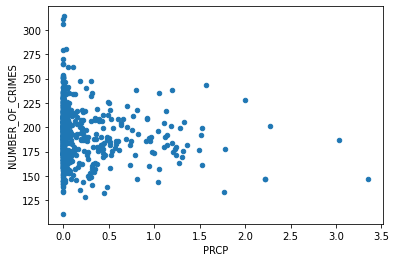

In [245]:
#What is the correlation between precipitation amounts and number of crimes per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['NUMBER_OF_CRIMES']))
#precipitation/crimes
date_crime_count_df.plot(x='PRCP', y='NUMBER_OF_CRIMES', kind='scatter', )

(-0.1251550364087384, 0.0006954402585593036)


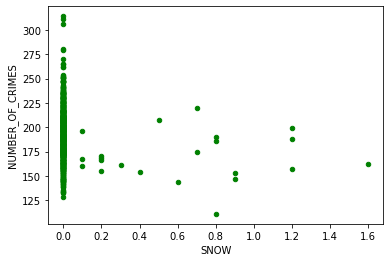

In [246]:
#What is the correlation between snow amounts and number of crimes per day
print(stats.pearsonr(date_crime_count_df['SNOW'],date_crime_count_df['NUMBER_OF_CRIMES']))
#Scatter plot for snow and number of crimes
date_crime_count_df.plot(x='SNOW', y='NUMBER_OF_CRIMES', kind='scatter', color='green', )

(0.2981289052130566, 1.800050733230918e-16)


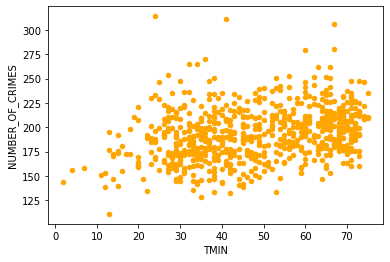

In [247]:
#What is the correlation between TMIN and number of crimes per day
print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='TMIN', y='NUMBER_OF_CRIMES', kind='scatter', color='orange', )

(0.30472422856089904, 3.5787839285259404e-17)


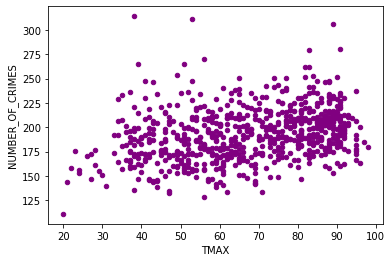

In [248]:
#What is the correlation between TMAX and number of crimes per day
print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='TMAX', y='NUMBER_OF_CRIMES', kind='scatter', color='purple', )

(0.40131654837873626, 1.1608098097953829e-29)


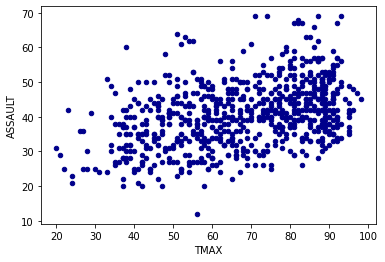

In [258]:
#What is the correlation between TMAX and number of assaults per day
print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['ASSAULT']))
date_crime_count_df.plot(x='TMAX', y='ASSAULT', kind='scatter', color='darkblue', )

(-0.07505213715041026, 0.0425016398350216)


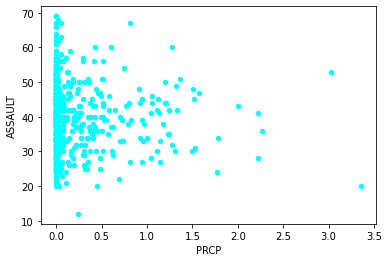

In [262]:
#What is the correlation between Precipitation and assaults per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ASSAULT']))
date_crime_count_df.plot(x='PRCP', y='ASSAULT', kind='scatter', color='aqua', )

(-0.007916895195455591, 0.8307917525050307)


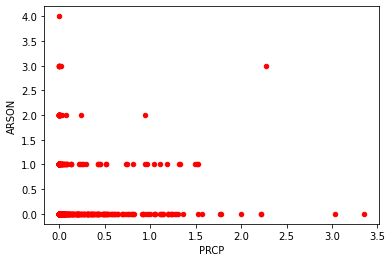

In [250]:
#What is the correlation between Precipitation and arsons per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ARSON']))
date_crime_count_df.plot(x='PRCP', y='ARSON', kind='scatter', color='red', )

(0.00846247167260333, 0.8193255864454945)


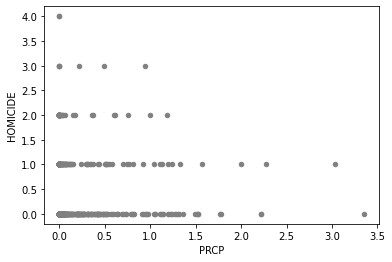

In [251]:
#What is the correlation between Precipitation and Homicides per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['HOMICIDE']))
date_crime_count_df.plot(x='PRCP', y='HOMICIDE', kind='scatter', color='grey', )

(-0.02978623140076134, 0.4213213670708609)


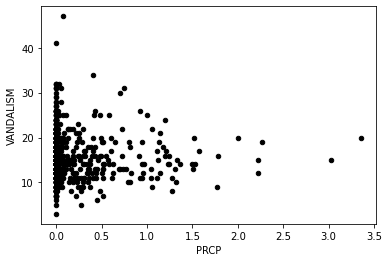

In [252]:
#What is the correlation between Precipitation and vandalisms per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['VANDALISM']))
date_crime_count_df.plot(x='PRCP', y='VANDALISM', kind='scatter', color='black', )

(-0.04580993002618637, 0.21605236703301192)


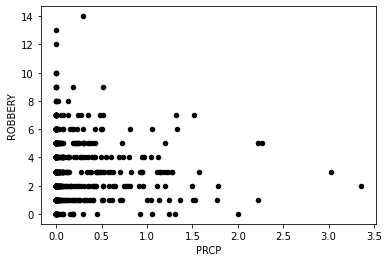

In [257]:
#What is the correlation between Precipitation and robbery per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ROBBERY']))
date_crime_count_df.plot(x='PRCP', y='ROBBERY', kind='scatter', color='black', )